<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="https://#item31">Data Engineering</a>
2.  <a href="https://#item31">Data Engineering Process</a>
3.  <a href="https://#item32">Working with different file formats</a>
4.  <a href="https://#item33">Data Analysis</a>

</font>
</div>


# Data Engineering


**Data engineering** is one of the most critical and foundational skills in any data scientist’s toolkit.


# Data Engineering Process


There are several steps in Data Engineering process.

1.  **Extract** - Data extraction is getting data from multiple sources. Ex. Data extraction from a website using Web scraping or gathering information from the data that are stored in different formats(JSON, CSV, XLSX etc.).

2.  **Transform** - Tarnsforming the data means removing the data that we don't need for further analysis and converting the data in the format that all the data from the multiple sources is in the same format.

3.  **Load** - Loading the data inside a data warehouse. Data warehouse essentially contains large volumes of data that are accessed to gather insights.


# Working with different file formats


In the real-world, people rarely get neat tabular data. Thus, it is mandatory for any data scientist (or data engineer) to be aware of different file formats, common challenges in handling them and the best, most efficient ways to handle this data in real life. We have reviewed some of this content in other modules.


#### File Format


A file format is a standard way in which information is encoded for storage in a file. First, the file format specifies whether the file is a binary or ASCII file. Second, it shows how the information is organized. For example, the comma-separated values (CSV) file format stores tabular data in plain text.

To identify a file format, you can usually look at the file extension to get an idea. For example, a file saved with name “Data” in “CSV” format will appear as “Data.csv”. By noticing the “.csv” extension, we can clearly identify that it is a “CSV” file and the data is stored in a tabular format.


There are various formats for a dataset, .csv, .json, .xlsx etc. The dataset can be stored in different places, on your local machine or sometimes online.

**In this section, you will learn how to load a dataset into our Jupyter Notebook.**


Now, we will look at some file formats and how to read them in Python:


# Comma-separated values (CSV) file format


The **Comma-separated values** file format falls under a spreadsheet file format.

In a spreadsheet file format, data is stored in cells. Each cell is organized in rows and columns. A column in the spreadsheet file can have different types. For example, a column can be of string type, a date type, or an integer type.

Each line in CSV file represents an observation, or commonly called a record. Each record may contain one or more fields which are separated by a comma.


## Reading data from CSV in Python


The **Pandas** Library is a useful tool that enables us to read various datasets into a Pandas data frame

Let us look at how to read a CSV file in Pandas Library.

We use **pandas.read_csv()** function to read the csv file. In the parentheses, we put the file path along with a quotation mark as an argument, so that pandas will read the file into a data frame from that address. The file path can be either a URL or your local file address.


In [1]:
import piplite
await piplite.install(['seaborn', 'lxml', 'openpyxl'])

import pandas as pd

/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
from pyodide.http import pyfetch

filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/addresses.csv"

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

await download(filename, "addresses.csv")

df = pd.read_csv("addresses.csv", header=None)

In [4]:
df

,0,1,2,3,4,5
0,John,Doe,120 jefferson st.,Riverside,NJ,8075
1,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
2,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
3,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
4,NaN,Blankman,NaN,SomeTown,SD,298
5,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


#### Adding column name to the DataFrame

We can add columns to an existing DataFrame using its **columns** attribute.


In [5]:
df.columns =['First Name', 'Last Name', 'Location ', 'City','State','Area Code']

In [6]:
df

,First Name,Last Name,Location,City,State,Area Code
0,John,Doe,120 jefferson st.,Riverside,NJ,8075
1,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
2,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
3,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
4,NaN,Blankman,NaN,SomeTown,SD,298
5,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


#### Selecting a single column

To select the first column 'First Name', you can pass the column name as a string to the indexing operator.


In [7]:
df["First Name"]

0                     John
1                     Jack
2            John "Da Man"
3                  Stephen
4                      NaN
5    Joan "the bone", Anne
Name: First Name, dtype: object

#### Selecting multiple columns

To select multiple columns, you can pass a list of column names to the indexing operator.


In [8]:
df = df[['First Name', 'Last Name', 'Location ', 'City','State','Area Code']]
df

,First Name,Last Name,Location,City,State,Area Code
0,John,Doe,120 jefferson st.,Riverside,NJ,8075
1,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
2,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
3,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
4,NaN,Blankman,NaN,SomeTown,SD,298
5,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


#### Selecting rows using .iloc and .loc

Now, let's see how to use .loc for selecting rows from our DataFrame.

**loc() : loc() is label based data selecting method which means that we have to pass the name of the row or column which we want to select.**


In [9]:
# To select the first row
df.loc[0]

First Name                 John
Last Name                   Doe
Location      120 jefferson st.
City                  Riverside
State                        NJ
Area Code                  8075
Name: 0, dtype: object

In [10]:
# To select the 0th,1st and 2nd row of "First Name" column only
df.loc[[0,1,2], "First Name" ]

0             John
1             Jack
2    John "Da Man"
Name: First Name, dtype: object

Now, let's see how to use .iloc for selecting rows from our DataFrame.

**iloc() : iloc() is a indexed based selecting method which means that we have to pass integer index in the method to select specific row/column.**


In [11]:
# To select the 0th,1st and 2nd row of "First Name" column only
df.iloc[[0,1,2], 0]

0             John
1             Jack
2    John "Da Man"
Name: First Name, dtype: object

For more information please read the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01).

Let perform some basic transformation in pandas.


### Transform Function in Pandas

Python’s Transform function returns a self-produced dataframe with transformed values after applying the function specified in its parameter.

Let's see how Transform function works.


In [12]:
#import library
import pandas as pd
import numpy as np

In [13]:
#creating a dataframe
df=pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['a', 'b', 'c'])
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


Let’s say we want to add 10 to each element in a dataframe:


In [14]:
#applying the transform function
df = df.transform(func = lambda x : x + 10)
df

,a,b,c
0,11,12,13
1,14,15,16
2,17,18,19


Now we will use DataFrame.transform() function to find the square root to each element of the dataframe.


In [15]:
result = df.transform(func = ['sqrt'])

In [16]:
result

,a,b,c
,sqrt,sqrt,sqrt
0,3.316625,3.464102,3.605551
1,3.741657,3.872983,4.000000
2,4.123106,4.242641,4.358899


For more information about the **transform()** function  please read the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01).


# JSON file Format


**JSON (JavaScript Object Notation)** is a lightweight data-interchange format. It is easy for humans to read and write.

JSON is built on two structures:

1.  A collection of name/value pairs. In various languages, this is realized as an object, record, struct, dictionary, hash table, keyed list, or associative array.

2.  An ordered list of values. In most languages, this is realized as an array, vector, list, or sequence.

JSON is a language-independent data format. It was derived from JavaScript, but many modern programming languages include code to generate and parse JSON-format data. It is a very common data format with a diverse range of applications.


The text in JSON is done through quoted string which contains the values in key-value mappings within { }. It is similar to the dictionary in Python.


Python supports JSON through a built-in package called **json**. To use this feature, we import the json package in Python script.


In [17]:
import json

# Writing JSON to a File

This is usually called **serialization**. It is the process of converting an object into a special format which is suitable for transmitting over the network or storing in file or database.

To handle the data flow in a file, the JSON library in Python uses the **dump()** or **dumps()** function to convert the Python objects into their respective JSON object. This makes it easy to write data to files.


In [18]:
import json
person = {
    'first_name' : 'Mark',
    'last_name' : 'abc',
    'age' : 27,
    'address': {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}

#### serialization using dump() function

**json.dump()** method can be used for writing to JSON file.

Syntax: json.dump(dict, file_pointer)

Parameters:

1.  **dictionary** – name of the dictionary which should be converted to JSON object.
2.  **file pointer** – pointer of the file opened in write or append mode.


In [19]:
with open('person.json', 'w') as f:  # writing JSON object
    json.dump(person, f)

#### serialization using dumps() function

**json.dumps()** that helps in converting a dictionary to a JSON object.

It takes two parameters:

1.  **dictionary** – name of the dictionary which should be converted to JSON object.
2.  **indent** – defines the number of units for indentation


In [20]:
# Serializing json  
json_object = json.dumps(person, indent = 4) 
  
# Writing to sample.json 
with open("sample.json", "w") as outfile: 
    outfile.write(json_object) 

In [21]:
print(json_object)

{
    "first_name": "Mark",
    "last_name": "abc",
    "age": 27,
    "address": {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}


Our Python objects are now serialized to the file. To deserialize it back to the Python object, we use the load() function.


# Reading JSON to a File


This process is usually called **Deserialization** - it is the reverse of serialization. It converts the special format returned by the serialization back into a usable object.

### Using json.load()

The JSON package has json.load() function that loads the json content from a json file into a dictionary.

It takes one parameter:

File pointer: A file pointer that points to a JSON file.


In [22]:
import json 
  
# Opening JSON file 
with open('sample.json', 'r') as openfile: 
  
    # Reading from json file 
    json_object = json.load(openfile) 
  
print(json_object) 
print(type(json_object)) 

{'first_name': 'Mark', 'last_name': 'abc', 'age': 27, 'address': {'streetAddress': '21 2nd Street', 'city': 'New York', 'state': 'NY', 'postalCode': '10021-3100'}}
<class 'dict'>


# XLSX file format


**XLSX** is a Microsoft Excel Open XML file format. It is another type of Spreadsheet file format.

In XLSX data is organized under the cells and columns in a sheet.


## Reading the data from XLSX file


Let’s load the data from XLSX file and define the sheet name. For loading the data you can use the Pandas library in python.


In [23]:
import pandas as pd

In [24]:
# Not needed unless you're running locally
# import urllib.request
# urllib.request.urlretrieve("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/file_example_XLSX_10.xlsx", "sample.xlsx")

filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/file_example_XLSX_10.xlsx"

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

await download(filename, "file_example_XLSX_10.xlsx")

df = pd.read_excel("file_example_XLSX_10.xlsx")

In [25]:
df

,0,First Name,Last Name,Gender,Country,Age,Date,Id
0,1,Dulce,Abril,Female,United States,32,15/10/2017,1562
1,2,Mara,Hashimoto,Female,Great Britain,25,16/08/2016,1582
2,3,Philip,Gent,Male,France,36,21/05/2015,2587
3,4,Kathleen,Hanner,Female,United States,25,15/10/2017,3549
4,5,Nereida,Magwood,Female,United States,58,16/08/2016,2468
5,6,Gaston,Brumm,Male,United States,24,21/05/2015,2554
6,7,Etta,Hurn,Female,Great Britain,56,15/10/2017,3598
7,8,Earlean,Melgar,Female,United States,27,16/08/2016,2456
8,9,Vincenza,Weiland,Female,United States,40,21/05/2015,6548


# XML file format


**XML is also known as Extensible Markup Language**. As the name suggests, it is a markup language. It has certain rules for encoding data. XML file format is a human-readable and machine-readable file format.

Pandas does not include any methods to read and write XML files. Here, we will take a look at how we can use other modules to read data from an XML file, and load it into a Pandas DataFrame.


### Writing with xml.etree.ElementTree


The **xml.etree.ElementTree** module comes built-in with Python. It provides functionality for parsing and creating XML documents. ElementTree represents the XML document as a tree. We can move across the document using nodes which are elements and sub-elements of the XML file.

For more information please read the [xml.etree.ElementTree](https://docs.python.org/3/library/xml.etree.elementtree.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01) documentation.


In [26]:
import xml.etree.ElementTree as ET

# create the file structure
employee = ET.Element('employee')
details = ET.SubElement(employee, 'details')
first = ET.SubElement(details, 'firstname')
second = ET.SubElement(details, 'lastname')
third = ET.SubElement(details, 'age')
first.text = 'Shiv'
second.text = 'Mishra'
third.text = '23'

# create a new XML file with the results
mydata1 = ET.ElementTree(employee)
# myfile = open("items2.xml", "wb")
# myfile.write(mydata)
with open("new_sample.xml", "wb") as files:
    mydata1.write(files)

### Reading with xml.etree.ElementTree


Let's have a look at a one way to read XML data and put it in a Pandas DataFrame. You can see the XML file in the Notepad of your local machine.


In [27]:
# Not needed unless running locally
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Sample-employee-XML-file.xml

import xml.etree.ElementTree as etree

filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Sample-employee-XML-file.xml"

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

await download(filename, "Sample-employee-XML-file.xml")

You would need to firstly parse an XML file and create a list of columns for data frame, then extract useful information from the XML file and add to a pandas data frame.

Here is a sample code that you can use.:


In [28]:
tree = etree.parse("Sample-employee-XML-file.xml")

root = tree.getroot()
columns = ["firstname", "lastname", "title", "division", "building","room"]

datatframe = pd.DataFrame(columns = columns)

for node in root: 

    firstname = node.find("firstname").text

    lastname = node.find("lastname").text 

    title = node.find("title").text 
    
    division = node.find("division").text 
    
    building = node.find("building").text
    
    room = node.find("room").text
    
    datatframe = datatframe.append(pd.Series([firstname, lastname, title, division, building, room], index = columns), ignore_index = True)

In [29]:
datatframe

,firstname,lastname,title,division,building,room
0,Shiv,Mishra,Engineer,Computer,301,11
1,Yuh,Datta,developer,Computer,303,02
2,Rahil,Khan,Tester,Computer,304,10
3,Deep,Parekh,Designer,Computer,305,14


### Reading xml  file using pandas.read_xml function

We can also read the downloaded xml file using the read_xml function present in the pandas library which returns a Dataframe object.

For more information read the <a href="https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.read_xml.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01#pandas-read-xml">pandas.read_xml</a> documentation.


In [30]:
# Herein xpath we mention the set of xml nodes to be considered for migrating  to the dataframe which in this case is details node under employees.
df=pd.read_xml("Sample-employee-XML-file.xml", xpath="/employees/details") 

### Save Data


Correspondingly, Pandas enables us to save the dataset to csv by using the **dataframe.to_csv()** method, you can add the file path and name along with quotation marks in the parentheses.

For example, if you would save the dataframe df as **employee.csv** to your local machine, you may use the syntax below:


In [31]:
datatframe.to_csv("employee.csv", index=False)

We can also read and save other file formats, we can use similar functions to **`pd.read_csv()`** and **`df.to_csv()`** for other data formats. The functions are listed in the following table:


<h2>Read/Save Other Data Formats</h2>

| Data Formate |        Read       |            Save |
| ------------ | :---------------: | --------------: |
| csv          |  `pd.read_csv()`  |   `df.to_csv()` |
| json         |  `pd.read_json()` |  `df.to_json()` |
| excel        | `pd.read_excel()` | `df.to_excel()` |
| hdf          |  `pd.read_hdf()`  |   `df.to_hdf()` |
| sql          |  `pd.read_sql()`  |   `df.to_sql()` |
| ...          |        ...        |             ... |


Let's move ahead and perform some **Data Analysis**.


# Binary File Format

"Binary" files are any files where the format isn't made up of readable characters. It contain formatting information that only certain applications or processors can understand. While humans can read text files, binary files must be run on the appropriate software or processor before humans can read them.

Binary files can range from image files like JPEGs or GIFs, audio files like MP3s or binary document formats like Word or PDF.

Let's see how to read an **Image** file.

## Reading the Image file

Python supports very powerful tools when it comes to image processing. Let’s see how to process the images using the **PIL** library.

PIL is the Python Imaging Library which provides the python interpreter with image editing capabilities.


In [42]:
# importing PIL 
from PIL import Image 


import urllib.request
urllib.request.urlretrieve("https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg", "dog.jpg")

filename = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg"

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

await download(filename, "dog.jpg")

<class 'urllib.error.URLError'>: <urlopen error unknown url type: https>

In [40]:
# Read image 
img = Image.open('dog.jpg') 
  
# Output Images 
display(img)

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'dog.jpg'

# Data Analysis


In this section, you will learn how to approach data acquisition in various ways and obtain necessary insights from a dataset. By the end of this lab, you will successfully load the data into Jupyter Notebook and gain some fundamental insights via the Pandas Library.

In our case, the **Diabetes Dataset** is an online source and it is in CSV (comma separated value) format. Let's use this dataset as an example to practice data reading.


## About this Dataset

**Context:** This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases**. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years of age of Pima Indian heritage.

**Content:** The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


We have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label.


In [43]:
# Import pandas library
import pandas as pd

In [44]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

await download(filename, "diabetes.csv")
df = pd.read_csv("diabetes.csv")

After reading the dataset, we can use the **dataframe.head(n)** method to check the top n rows of the dataframe, where n is an integer. Contrary to **dataframe.head(n)**, **dataframe.tail(n)** will show you the bottom n rows of the dataframe.


In [45]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


To view the dimensions of the dataframe, we use the **`.shape`** parameter.


In [46]:
df.shape

(768, 9)

# Statistical Overview of dataset


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.


In [48]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pandas **describe()** is used to view some basic statistical details like percentile, mean, standard deviation, etc. of a data frame or a series of numeric values. When this method is applied to a series of strings, it returns a different output


### Identify and handle missing values


We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

**.isnull()**

**.notnull()**

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [49]:
missing_data = df.isnull()
missing_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method ".value_counts()"  counts the number of "True" values. 
</p>


In [50]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Pregnancies
False    768
Name: Pregnancies, dtype: int64

Glucose
False    768
Name: Glucose, dtype: int64

BloodPressure
False    768
Name: BloodPressure, dtype: int64

SkinThickness
False    768
Name: SkinThickness, dtype: int64

Insulin
False    768
Name: Insulin, dtype: int64

BMI
False    768
Name: BMI, dtype: int64

DiabetesPedigreeFunction
False    768
Name: DiabetesPedigreeFunction, dtype: int64

Age
False    768
Name: Age, dtype: int64

Outcome
False    768
Name: Outcome, dtype: int64



As you can see above, there is no missing values in the dataset.


<h3 id="correct_data_format">Correct data format</h3>

<p>Check all data is in the correct format (int, float, text or other).</p>

In Pandas, we use

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

Numerical variables should have type **'float'** or **'int'**.


In [51]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

As we can see above, All columns have the correct data type.


# Visualization


**Visualization** is one of the best way to get insights from the dataset. **Seaborn** and **Matplotlib** are two of Python's most powerful visualization libraries.


In [52]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

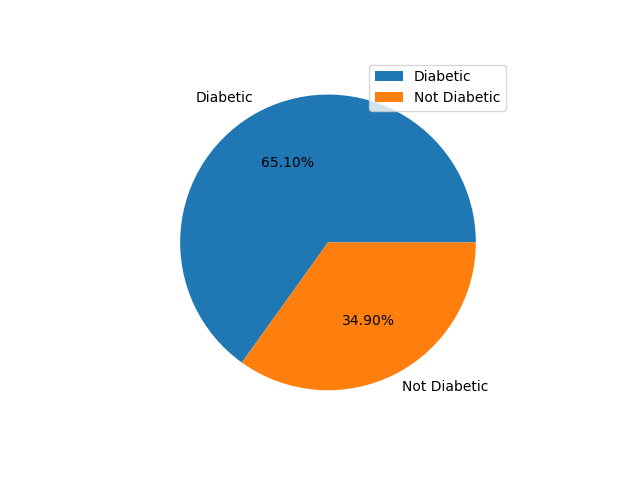

In [53]:
labels= 'Diabetic','Not Diabetic'
plt.pie(df['Outcome'].value_counts(),labels=labels,autopct='%0.02f%%')
plt.legend()
plt.show()

As you can see above, 65.10% females are Diabetic and 34.90% are Not Diabetic.


# Thank you for completing this Notebook


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description |
| ----------------- | ------- | ------------- | ------------------ |
| 2022-01-25        | 0.1     | Lakshmi Holla | added read_xml     |
